# HR ANALYTICS 

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')



## BASIC CHECK

In [8]:

print(df.shape)



(1470, 35)


In [12]:
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [11]:
print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [9]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:

print(df['Attrition'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64


# Perform EDA (Exploratory Data Analysis)

## Attrition by Department

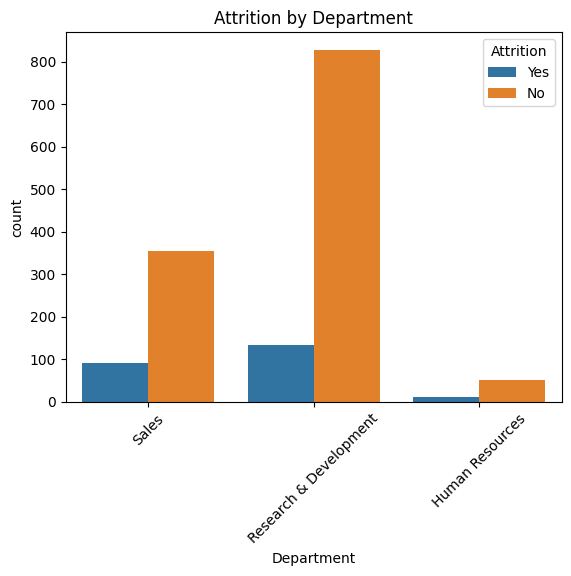

In [17]:
sns.countplot(data=df, x='Department', hue='Attrition')

plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


In [ ]:
Attrition by Monthly Income Bands

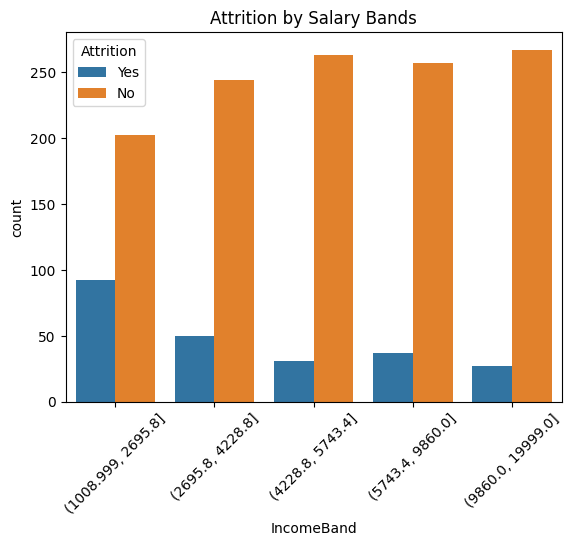

In [18]:
df['IncomeBand'] = pd.qcut(df['MonthlyIncome'], q=5)
sns.countplot(data=df, x='IncomeBand', hue='Attrition')
plt.title("Attrition by Salary Bands")
plt.xticks(rotation=45)
plt.show()


In [ ]:
Attrition by Promotions


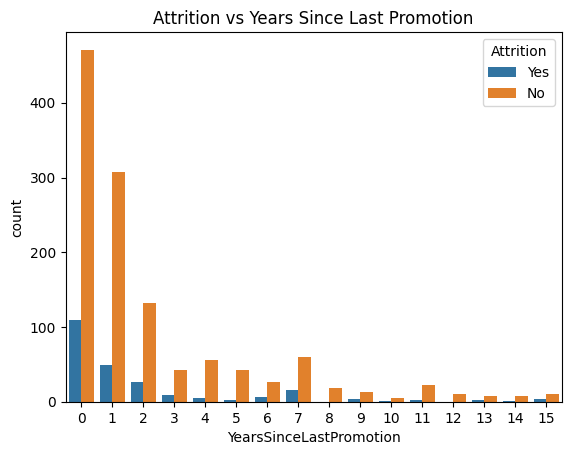

In [19]:
sns.countplot(data=df, x='YearsSinceLastPromotion', hue='Attrition')
plt.title("Attrition vs Years Since Last Promotion")
plt.show()


In [ ]:
Correlation Heatmap

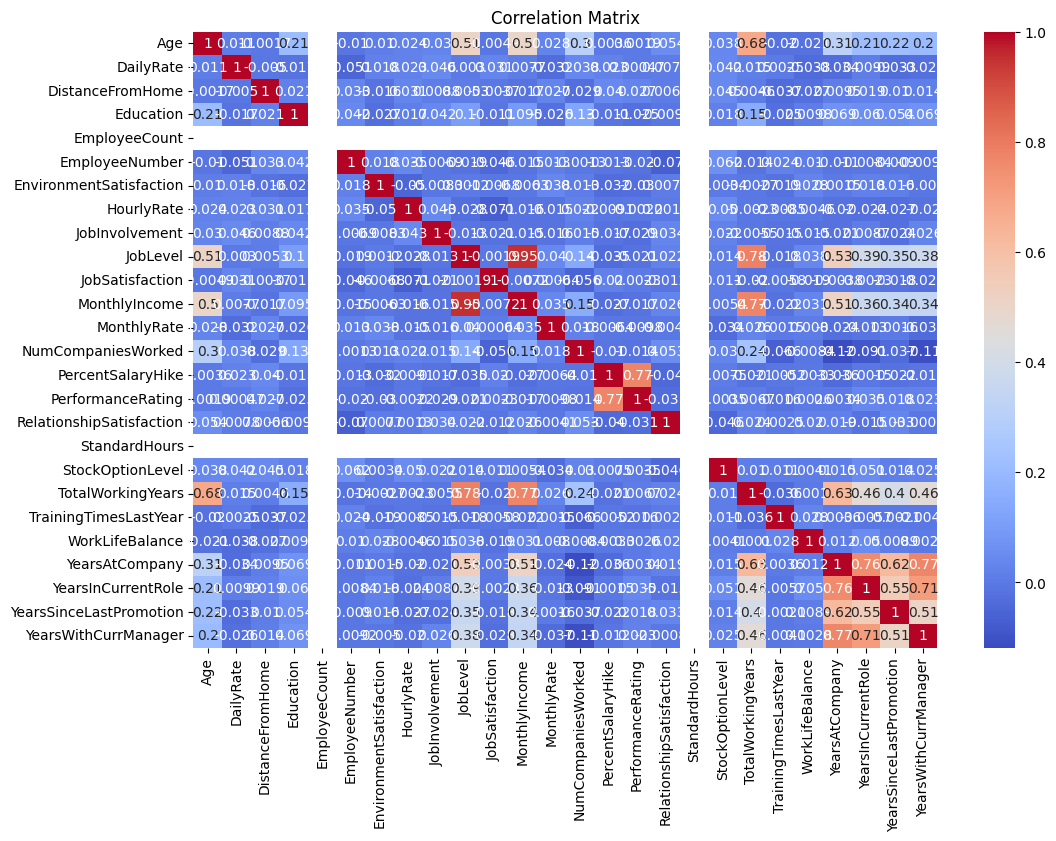

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


 ## Preprocessing for ML


In [42]:



df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


X = df_encoded.drop(['Attrition'], axis=1)
y = df_encoded['Attrition']  # 1 = Yes, 0 = No


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



 ## Build Classification Models

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)



C:\Users\Shrav\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluate Models

In [41]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))

print("\nDecision Tree:")
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.70      0.18      0.29        39

    accuracy                           0.88       294
   macro avg       0.79      0.58      0.61       294
weighted avg       0.86      0.88      0.85       294

[[252   3]
 [ 32   7]]

Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.26      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.57      0.54      0.55       294
weighted avg       0.80      0.83      0.81       294

[[238  17]
 [ 33   6]]


## SHAP Value Analysis

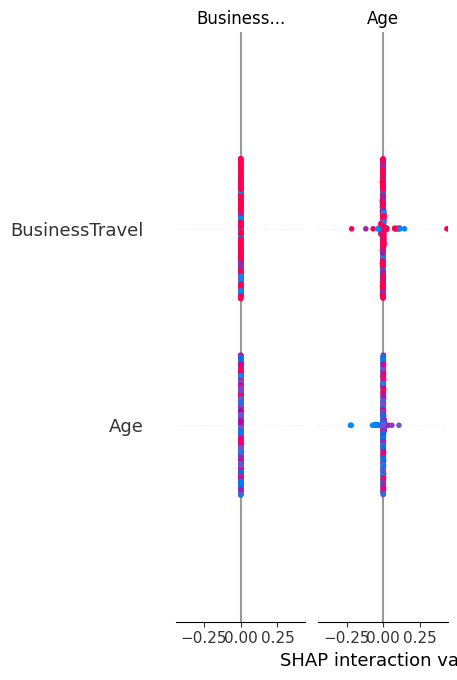

In [46]:
import shap


explainer = shap.Explainer(tree_model, X_test)
shap_values = explainer(X_test)


shap.summary_plot(shap_values, X_test)
